In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


# **Pre-processing**

In [2]:
df= pd.read_csv('../input/supermarket-sales/supermarket_sales - Sheet1.csv')

In [3]:
'''
convert to datetime
'''
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['date'] = pd.to_datetime(df['Date'])
df['day'] = (df['date']).dt.day
df['month'] = (df['date']).dt.month
df['year'] = (df['date']).dt.year
df['dayofweek']= (df['date']).dt.dayofweek.map(dayOfWeek)

df['time']= pd.to_datetime(df['Time'])
df['hour']= (df['time']).dt.hour

In [4]:
'''all columns (features)'''
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'date', 'day', 'month', 'year', 'dayofweek', 'time', 'hour'],
      dtype='object')

# **Average quantity of product lines bought across days of the week**

In [5]:
#Data of Average quantity of product lines bought across days of the week
a=df.groupby(['Product line', 'dayofweek'])['Quantity'].mean().reset_index()
result= a.pivot(index='Product line', columns= 'dayofweek', values= 'Quantity')
print (result)  #6,31

dayofweek                 Friday    Monday  Saturday    Sunday  Thursday  \
Product line                                                               
Electronic accessories  5.941176  5.391304  5.888889  6.700000  5.916667   
Fashion accessories     5.200000  5.111111  5.114286  5.150000  5.666667   
Food and beverages      5.000000  4.454545  4.870968  6.043478  5.800000   
Health and beauty       5.576923  5.384615  5.631579  5.714286  5.052632   
Home and lifestyle      5.458333  5.550000  6.208333  5.843750  5.000000   
Sports and travel       5.652174  4.562500  6.214286  5.625000  5.043478   

dayofweek                Tuesday  Wednesday  
Product line                                 
Electronic accessories  5.206897   4.944444  
Fashion accessories     4.576923   4.785714  
Food and beverages      6.461538   5.606061  
Health and beauty       5.344828   6.894737  
Home and lifestyle      6.181818   5.368421  
Sports and travel       5.115385   6.115385  


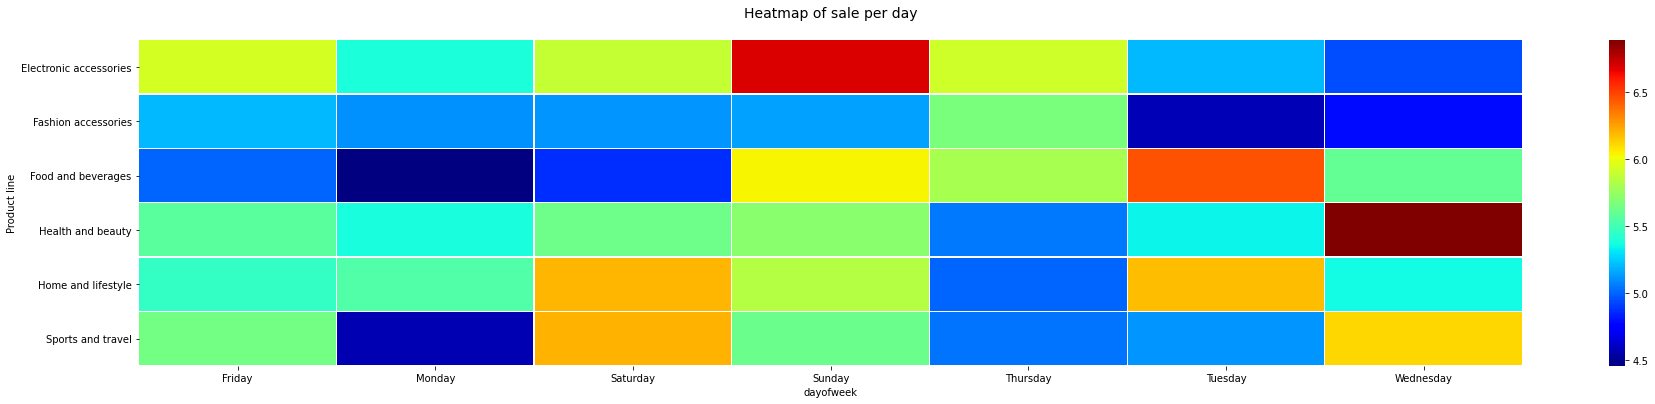

In [6]:
#Heatmap of Average quantity of product lines bought across days of the week
fig, ax= plt.subplots(figsize= (31,6))
title= "Heatmap of sale per day"
plt.title(title, fontsize= 14)
tt1= ax.title
tt1.set_position([0.5, 1.05])
sns.heatmap(result, fmt="",cmap='jet', linewidths= 0.30, ax=ax)


**Observations:**
1. There's a significantly larger sale of Electronic accessories on Sunday as opposed to other days.
2. Sports and Travel items are bought the least on Monday, Tuesday and Thursday.
3. Sports and Travel and Home and lifestyle are warmest on Saturday as compared to the rest of the week.


# **Number of invoices generated per day of week by each gender**

In [7]:
#data of number of invoices generated per day of week by each gender
b= df.groupby(['Gender', 'dayofweek'])['Invoice ID'].count().reset_index()
pivot_b = b.pivot(index='dayofweek', columns='Gender', values='Invoice ID')
print (pivot_b)

Gender     Female  Male
dayofweek              
Friday         65    74
Monday         68    57
Saturday       87    77
Sunday         67    66
Thursday       63    75
Tuesday        87    71
Wednesday      64    79


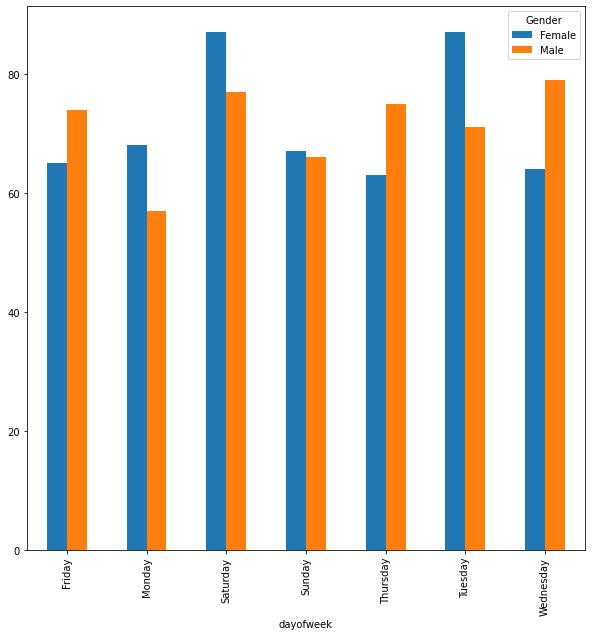

In [8]:
#bar graph of number of invoices generated per day of week by each gender
pivot_b.plot.bar(stacked=False, figsize= (10,10))

# **Gender wise distribution of rating per product line**

In [9]:
#data of gender wise distribution of rating per product line
c=df.groupby(['Gender', 'Product line'])['Rating'].mean().reset_index()
pivot_c = c.pivot(columns='Gender', index='Product line', values='Rating')
print (pivot_c)
print (pivot_c.shape)

Gender                    Female      Male
Product line                              
Electronic accessories  6.786905  7.059302
Fashion accessories     7.120833  6.921951
Food and beverages      7.203333  7.016667
Health and beauty       7.146875  6.898864
Home and lifestyle      6.763291  6.909877
Sports and travel       6.767045  7.084615
(6, 2)


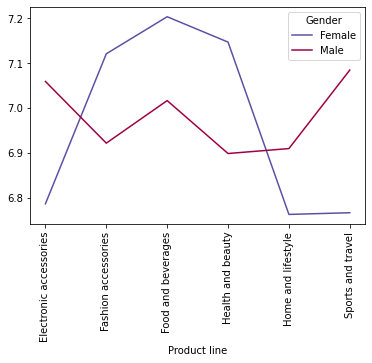

In [10]:
#line plot of gender wise distribution of rating per product line
lines = pivot_c.plot.line(rot=90, colormap='Spectral_r')

Observations:

If we assume the stereotypes to be true, following are the product lines and the Gender that is considered to be more interested in them:
* Electronic accessories- Male
* Fashion accessories- Female
* Food and Beverages- Neutral
* Health and Beauty- Female
* Home and lifestyle- Female
* Sports and travel- Male

Based on this assumption, each product line (excluding home and lifestyle) is rated more by the gender it caters to. This could 

# **Hour wise buying per day of the week**

In [11]:
#data of hour wise buying per day of the week
d=df.groupby(['dayofweek', 'hour'])['Invoice ID'].count().reset_index()
pivot_d = d.pivot(columns='dayofweek', index='hour', values='Invoice ID')
print (pivot_d)

dayofweek  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
hour                                                                     
10             18      12        16      11        18       16         10
11             11       9        12      11        15       20         12
12             10      14        18      11        11       11         14
13             16      10        14      18        12       13         20
14             14       6        11      13        14       15         10
15             18      18        12      11        12       14         17
16             10      16        14       6        12        9         10
17              6      11        12      11        15        9         10
18             11      11        18      15         9       12         17
19             13       8        23      17        10       28         14
20             12      10        14       9        10       11          9


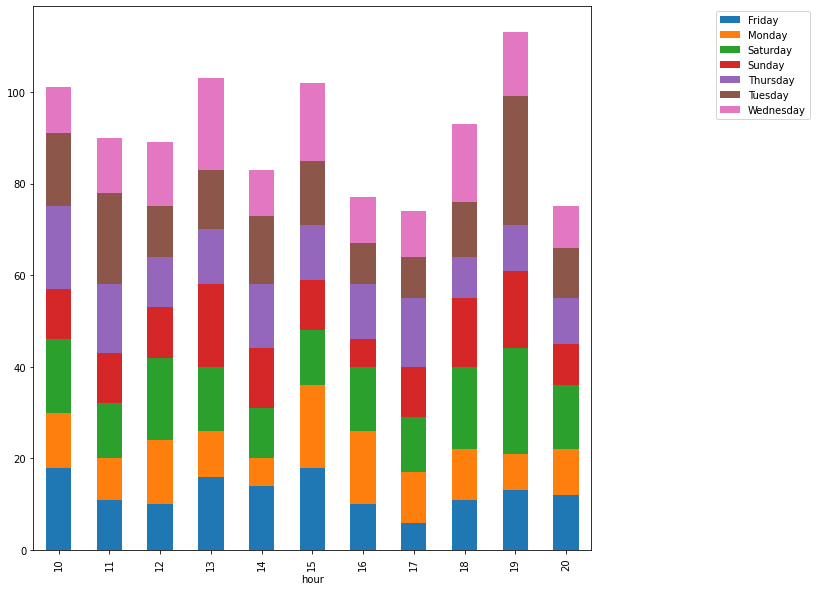

In [12]:
#stacked plot of hour wise buying per day of the week
pivot_d.plot.bar(stacked=True, figsize= (10,10)).legend(bbox_to_anchor=(1.4, 1))

**Observations:**

1. Most sales peak at 7 PM.
2. There is an almost equal distribution of sales at 1 PM on weekdays (usually lunch hour in offices).
3. Least amount of sale happens between 5 and 6 PM.


